# 图像金字塔与轮廓检测
## 图像金字塔
- 高斯金字塔
- 拉普拉斯金字塔

### 高斯金字塔
1. 向下采样方法（缩小）
$$
\frac{1}{16}\begin{pmatrix}1&4&6&4&1\\ 4&16&24&16&4\\ 6&24&36&24&6\\ 4&16&24&16&4\\ 1&4&6&4&1  \end{pmatrix}
$$

- 将$G_i$与高斯内核卷积
- 将所有的偶数行和列去除
2. 向上采样方法（放大）
$$
\begin{pmatrix}10&30\\ 56&96  \end{pmatrix}  \to \begin{pmatrix}10&0&30&0\\ 0&0&0&0\\ 56&0&96&0\\ 0&0&0&0  \end{pmatrix}
$$

- 将图像在每个方向上扩大为原来的两倍，新增的行和列用0赋值；
- 使用原先相同的内核（乘以4）与放大后的图像进行卷积，获得近似值。

In [1]:
# 导入库
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# 读入图像
img_lena = cv2.imread('lena.jpg')
print ((img_lena).shape)

(256, 256, 3)


In [6]:
# 上采样
img_up = cv2.pyrUp(img_lena)
print ((img_up).shape)

(512, 512, 3)


In [7]:
# 下采样
img_down = cv2.pyrDown(img_lena)
print ((img_down).shape)

(128, 128, 3)


(<matplotlib.axes._subplots.AxesSubplot at 0x11cfdbf90>,
 Text(0.5, 1.0, 'down'))

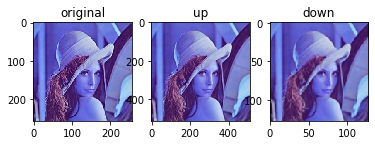

In [13]:
plt.subplot(131), plt.imshow(img_lena), plt.title('original')
plt.subplot(132), plt.imshow(img_up), plt.title('up')
plt.subplot(133), plt.imshow(img_down), plt.title('down')

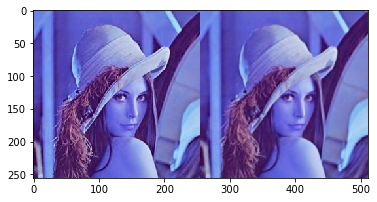

In [14]:
# up_down
up = cv2.pyrUp(img_lena)
up_down = cv2.pyrDown(up)
res = np.hstack((img_lena, up_down))
plt.imshow(res)

> 对原图像先进行上采样再进行下采样，虽然最终图像形状没有变化，但是这个过程中图像丢失了一些信息，因此结果图相较于原图会更加模糊

### 拉普拉斯金字塔
$$
L_i = G_i - PyrUp(PyrDown(G_i))
$$

- 低通滤波
- 缩小尺寸
- 放大尺寸
- 图像相减

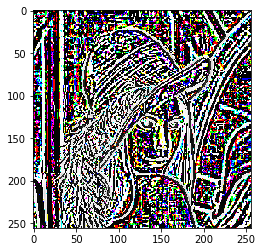

In [15]:
# example
img_lena = cv2.imread('lena.jpg')
down = cv2.pyrDown(img_lena)
down_up = cv2.pyrUp(down)
result = img_lena - down_up
plt.imshow(result)

## 图像轮廓
**cv2.findContours(img, mode, method)**

mode: 轮廓检索模式
- RETR_EXTERNAL: 只检索最外面的轮廓
- RETR_LIST: 检索所有的轮廓，并将其保存到一条链表当中
- RETR_CCOMP: 检索所有的轮廓，并将它们组织为两层：顶层是各部分的外部边界，第二层是空洞的边界
- RETR_TREE: 检索所有的轮廓，并重构嵌套轮廓的整个层次（最常用）

method：轮廓逼近方法
- CHAIN_APPROX_NONE: 以Freeman链码的方式输出轮廓，所有其他方法输出多边形（顶点的序列）
- CHAIN_APPROX_SIMPLE: 压缩水平的、垂直的和斜的部分，也就是，函数只保留他们的终点部分

> 注意区分轮廓与边缘的差异：边缘是零零散散的，而轮廓是一个整体

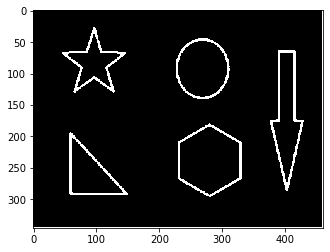

In [18]:
# 导入图像并进行预处理（灰度化、阈值化）
img_contour = cv2.imread('contour.png')
img_gray = cv2.cvtColor(img_contour, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap=plt.cm.gray)

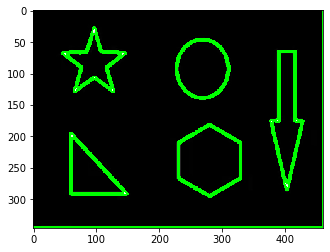

In [19]:
# 提取轮廓信息，返回的三个值中hierarchy表示层级
binary, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# 注意绘制时要使用copy，否则原图会变；opencv绘制颜色为BGR（plt显示为RGB）
# 第三个参数为-1表示：绘制所有的轮廓
draw_img = img_contour.copy()
res = cv2.drawContours(draw_img, contours, -1, (0, 255, 0), 2)
plt.imshow(res)

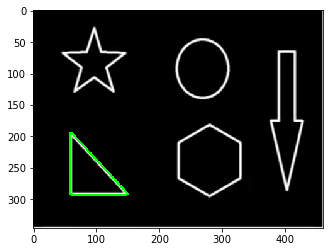

In [25]:
draw_img = img_contour.copy()
res = cv2.drawContours(draw_img, contours, 0, (0, 255, 0), 2)
plt.imshow(res)

### 轮廓特征

In [26]:
# 轮廓所围的面积
cnt = contours[0]
cv2.contourArea(cnt)

4759.5

In [28]:
# 轮廓的周长
cv2.arcLength(cnt, True)

327.52185904979706

### 轮廓近似

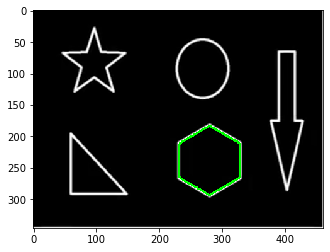

In [34]:
img = cv2.imread('contour.png')

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

binary, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

draw_img = img.copy()
res = cv2.drawContours(draw_img, contours, 3, (0, 255, 0), 2)

plt.imshow(res)

(<matplotlib.axes._subplots.AxesSubplot at 0x12fcea190>,
 Text(0.5, 1.0, 'large portion'))

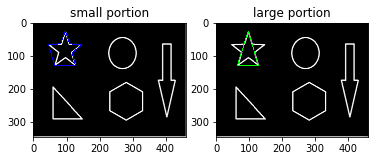

In [61]:
cnt = contours[8]
# 比例值越小，则越接近于初始轮廓
eplison_1 = 0.05*cv2.arcLength(cnt, True)
approx_1 = cv2.approxPolyDP(cnt, eplison_1, True)
eplison_2 = 0.1*cv2.arcLength(cnt, True)
approx_2 = cv2.approxPolyDP(cnt, eplison_2, True)

draw_img_1 = img.copy()
draw_img_2 = img.copy()

res_1 = cv2.drawContours(draw_img_1, [approx_1], -1, (0, 0, 255), 2)
res_2 = cv2.drawContours(draw_img_2, [approx_2], -1, (0, 255, 0), 2)
plt.subplot(121), plt.imshow(res_1), plt.title('small portion')
plt.subplot(122), plt.imshow(res_2), plt.title('large portion')

### 边界矩形

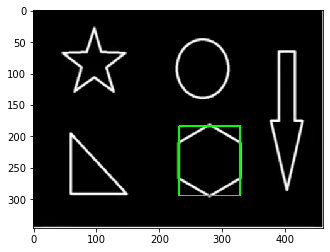

In [63]:
img = cv2.imread('contour.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

binary, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

cnt = contours[3]

x, y ,w, h = cv2.boundingRect(cnt)
img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.imshow(img)

### 外接圆

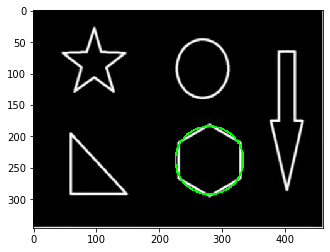

In [64]:
img = cv2.imread('contour.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

binary, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

cnt = contours[3]

(x, y), radius = cv2.minEnclosingCircle(cnt)
(x, y) = (int(x), int(y))
radius = int(radius)
img = cv2.circle(img, (x, y), radius, (0, 255, 0), 2)
plt.imshow(img)

## 模板匹配
模板匹配和卷积原理很像，模板在原图像上从原点开始滑动，计算模板与（图像被模板覆盖区域）的差别程度，这个差别程度的计算方法在opencv中有6种，然后将每次计算的结果放入一个矩阵中，作为结果输出。假如原图像大小是AxB，模板大小是axb，则输出结果的矩阵是(A-a+1)x(B-b+1)

匹配顺序：从左到右、从上到下
- TM_SQDIFF: 计算平方差，计算出来的值越小，越相关
- TM_SQDIFF_NORMED：计算归一化平方差，计算出来的值越接近于0，越相关
- TM_CCORR：计算相关性，计算出来的值越大，越相关
- TM_CCORR_NORMED： 计算归一化相关性，计算出来的值越接近于1，越相关
- TM_CCOEFF_NORMED：计算归一化相关系数，计算出来的值越接近于1，越相关

In [71]:
img_lena = cv2.imread('lena.jpg')
template = cv2.imread('face.png')

res = cv2.matchTemplate(img_lena, template, cv2.TM_SQDIFF)
# 最小值为左上点
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [77]:
methods = ['cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED']

0


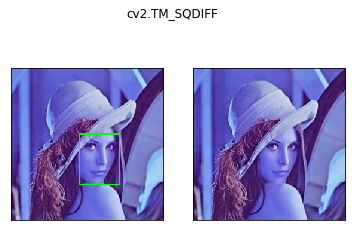

1


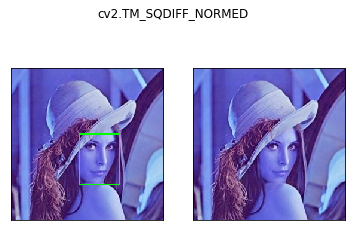

2


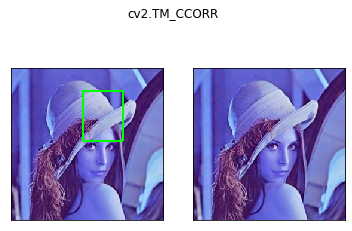

3


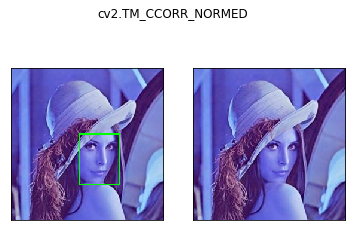

4


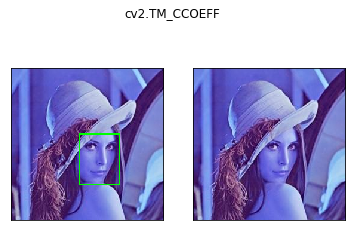

5


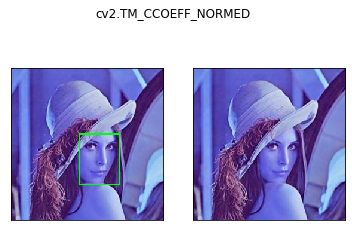

In [84]:
for meth in methods:
    img_2 = img_lena.copy()
    # 匹配方法的真值
    method = eval(meth)
    print(method)
    
    res = cv2.matchTemplate(img_lena, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # 如果是平方差或归一化平方差，取最小值
    if meth in ['cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']:
        top_left = min_loc
    else:
        top_left = max_loc
    # shape表示含义为 h * w * c
    bottom_right = (top_left[0]+template.shape[1], top_left[1]+template.shape[0])
    
    # 画矩形
    res = cv2.rectangle(img_2, top_left, bottom_right, (0, 255, 0), 2)
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img_lena, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

> 使用归一化后的结果更加稳定可靠

### 匹配多个对象

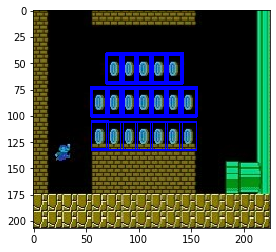

In [95]:
img_rgb = cv2.imread('images_for_note/mario.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('images_for_note/mario_coin.jpg', cv2.IMREAD_GRAYSCALE)
h, w = template.shape[:2]
# res获得每一个窗口的计算值
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

threshold = 0.8
# 取匹配程度大于80%的坐标
loc = np.where(res > threshold)
for pt in zip(*loc[: :-1]): # *表示可选参数
    bottom_right = (pt[0]+w, pt[1]+h)
    cv2.rectangle(img_rgb, pt, bottom_right, (0, 0, 255), 1)
    
plt.imshow(img_rgb)